# Model Selection, Auto-ARIMA, Forecasting, and Seasonality

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's load in the data we used last time, but this time, we won't subset to a certain year range. 

In [1]:
us_temp = pd.read_csv('../data/usa-annual-temp.csv')
us_temp.head()

In [2]:
us_temp['year'] = pd.to_datetime(us_temp['year'], format='%Y')
us_temp = us_temp.set_index('year')

fig, ax = plt.subplots()
ax.plot(us_temp)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)');

Let's fit two different ARIMA models for our time series. 

In [3]:
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(us_temp, order=(  )).fit()
model2 = ARIMA(us_temp, order=(  )).fit()

There are several different metrics that we can use to differentiate which model is better.

Here we use mean squared error, AIC, and BIC, three such metrics. We want all of these to be smaller to optimize our model. 

In [4]:
print(model1.mse)
print(model2.mse)

In [5]:
print(model1)
print(model2)

In [6]:
print(model1)
print(model2)

Using these metrics, we can fit many different ARIMA models with different number of AR, I, and MA terms.


In [7]:
ar 
i 
ma 

scores = {
    'combo':[],
    'aic':[]
}


            
            combo = str( ) + ','  + str( ) + ',' + str( ) 
            
            aic = ARIMA(us_temp, order = ()).fit().aic
            
            scores['combo'].append(combo)
            scores['aic'].append(aic)

scores_df = pd.DataFrame(scores)

In [8]:
scores_df.sort_values('aic')

In [9]:
arima_413 = ARIMA(us_temp, order=(4,1,3)).fit()
arima_413.summary()

Our model can be used to predict future temperature values. This is called **forecasting**.

While we can predict any number of future points, it becomes more challenging to predict distant values. There is more and more uncertainty the further out we go. 

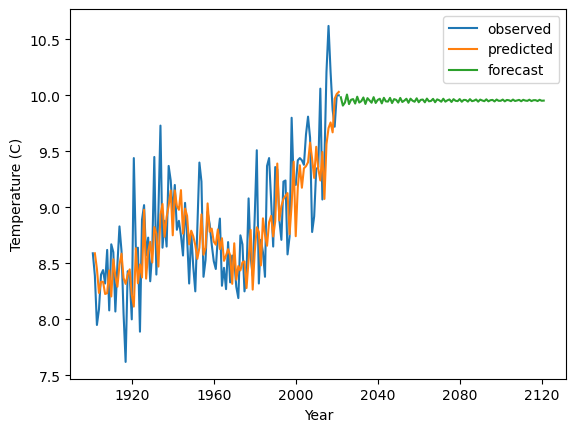

In [79]:
# forecast 100 years out
arima_forecast = arima_413

fig, ax = plt.subplots()

ax.plot(us_temp, label='observed')
ax.plot(arima_413.predict()[1:], label='predicted')
ax.plot(arima_forecast, label='forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')
ax.legend();

## Auto-ARIMA

A package called `pmdarima` has a function called `auto_arima()` that will pick the best ARIMA model automatically for us by minimizing these model fitting metrics. 

To install the `pmdarima` package, you can do one of the following:

GUI:

1) Open Anaconda Navigator
2) Click on Environments 
3) Make sure you click on 'base (root)'.
4) Click 'Channels', then 'Add...', and then type 'conda-forge' and hit enter.
5) Hit 'Update index...'
6) Change the drop-down menu from 'Installed' to 'Not-installed'.
7) Search for 'pmdarima'. Check it, and hit apply.

Command line

1) Go to Terminal or Git Bash.
2) Run 'conda activate'.
3) Run 'conda install -c conda-forge pmdarima'
4) Type 'y' and hit enter if you get asked a prompt.

After you do this, you will need to restart the Jupyter notebook and re-run.

When we run `auto-arima()`, it goes through various ARIMA models and fits each, then picks the best fitting model. 

Note you do not need to use `.fit()`.

To get predictions for our samples, we can use `.predict_in_sample()`.

In [10]:
in_samp_pred = auto_arima_model

fig, ax = plt.subplots()
ax.plot(us_temp, label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')
ax.legend();

With `auto_arima()`, you can do forecasts similarly to how you would with the statsmodels variant with `.predict()`. However, you can also easily visualize **confidence intervals**, essentially the margin of error for our forecasts.

In [11]:


fig, ax = plt.subplots()
ax.plot(us_temp[1:], label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.plot(forecast, label='forecast')
ax.fill_between(forecast.index, ci[:,0], ci[:,1], color = 'gray', alpha=0.5) # our confidence intervals
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')
ax.legend();

## Seasonal data

Time series data is not always yearly; it can monthly, daily, hourly, or even more frequent. 

It is always important to consider the frequency of your data when working with time series.

Here, we are loading in monthly mean air temperatures from Stockholm, Sweden.

In [12]:
stockholm = pd.read_csv('../data/stockholm-monthly-temp.csv')
stockholm.head()

This is a very large time series, but we're only going to look at data starting in 1950.

In [13]:
stockholm['date'] = pd.to_datetime(stockholm['date'])
stockholm = stockholm.set_index('date').sort_index()
stockholm = stockholm.loc[stockholm.index >= '1950-1-1']
stockholm.head()

When we visualize our data, we can identify a very clear pattern: the temperature is going up and down very regularly. If you examine it, you'll notice it happens at the same time every year.

This is called **seasonality**, and it is when a time series exhibits a pattern at regular intervals.

Though it is called seasonality, the pattern does not have to occur with the seasons: it can occur monthly, or every 4 days. In our case, our seasonality occurs every 12 samples, since every 12 samples will be the same month. 

In [14]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(stockholm)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)');

To see this seasonal component a bit more evidentally, we can **decompose** the time series into 3 components: trend, seasonal, and residual. 

The trend is simply looking at the average of time series over time in small chunks. This is called  moving average smoothing (which is not the same thing as the moving average models we talked about last time). 

The seasonal component is what we discussed above: the part that is repeating at regular intervals. If this panel has an obvious pattern, your time series has a seasonal aspect.

Finally, the residual is what is left over after taking into account the trend and the seasonality. It is essentially detrended data. 

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose


The `auto_arima()` function from pmdarima allows for accounting for seasonality.

It will produce a SARIMA model, with terms that includes seasonal terms.

The first 3 terms are the same as for ARIMA. The next 4 terms new. Of those terms the first 3 are just seasonal versions of the ARIMA terms, and the fourth is the length of a season. For example, the seasonal AR terms will use values from 12 months ago to predict the next value. 

In [16]:
stock_model = auto_arima(stockholm,  , )
stock_model.summary()

In [18]:
forecast, ci = stock_model.predict(48, return_conf_int=True)

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(stockholm)
ax.plot(stock_model.predict_in_sample())
ax.plot(forecast)
ax.fill_between(forecast.index, ci[:,0], ci[:,1], color = 'gray', alpha=0.5)